<h2 style = "color:indigo" align = "center" > Logistic Regression: Handwriting Recognition (MNIST) </h2>

## Import packages

In [103]:
import time
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Load MNIST data from website

In [2]:
# Load data from https://www.openml.org/d/554
X_all, y_all = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

## Train test split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_all,y_all,test_size = 10000)
print('X_train shape',X_train.shape) # Trainset
print('y_train shape',y_train.shape) # Respective label

X_train shape (60000, 784)
y_train shape (60000,)


## Showing Training Digits and Labels

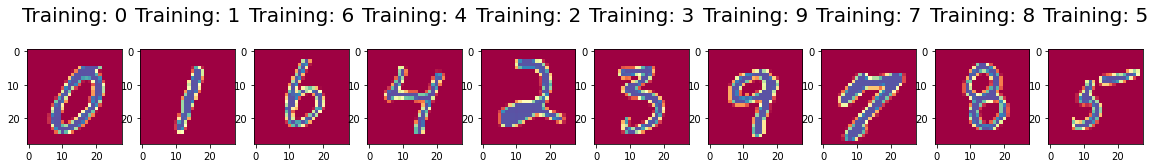

In [51]:
fig = plt.figure(figsize = (20,4))
for index, (image,label) in enumerate(zip(X_train[0:10],y_train[0:10])):
    plt.subplot(2,10, index + 1)
    plt.imshow(np.reshape(image,(28,28)),cmap = plt.cm.Spectral)
    plt.title('Training: %i\n' % int(label), fontsize = 20)

In [17]:
print(X_train[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  82. 239. 254. 254. 254. 255. 189.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   4.
  58. 254. 253. 253. 253. 253. 128.   6.   0.   0.   0.   0.   0.   0.
   0. 

## Set training time and define model

In [34]:
t0 = time.time()
logi_reg = LogisticRegression(solver = 'lbfgs')
logi_reg.fit(X_train,y_train)
traning_time = time.time()-t0

## Modeling

Accuracy score: 0.9208
Traning time: 9.532007932662964


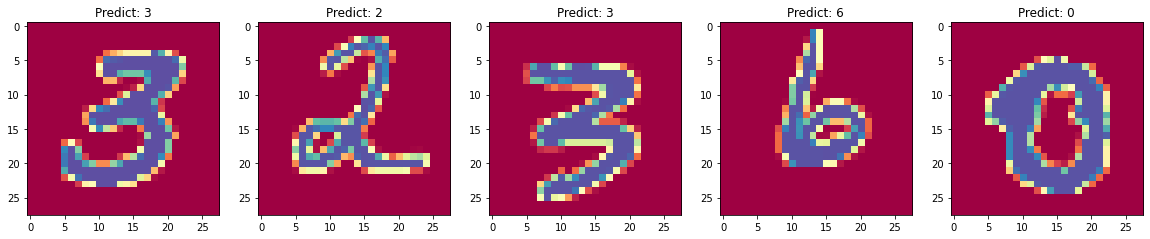

In [39]:
y_pred = logi_reg.predict(X_test)
print('Accuracy score: {}'.format(accuracy_score(y_pred,y_test)))
print('Traning time: {}'.format(traning_time))
fig = plt.figure(figsize = (20,4))
for i in range(0,5):
    plt.subplot(1,5,i+1)
    random_index = np.random.randint(0,len(y_test))
    plt.imshow(X_test[random_index].reshape(28,28),cmap = plt.cm.Spectral)
    plt.title('Predict: {}'.format(y_pred[random_index]))
plt.show()

## Evaluation

### Calculated misclassified items

In [42]:
index = 0 # Index of misclassfied items
sum_mis = 0 # Total of misclassfieditems
mis = []
for test,pred in zip(y_test,y_pred):
    if test != pred:
        mis.append(index)
        sum_mis +=1
    index+=1
print('List of misclassified index:',mis)
print('Total misclassified items: ',sum_mis)

List of misclassified index: [2, 4, 16, 46, 49, 50, 52, 53, 56, 67, 73, 109, 130, 140, 141, 146, 158, 185, 186, 212, 216, 235, 241, 251, 256, 259, 288, 293, 310, 313, 334, 378, 379, 382, 403, 406, 410, 415, 421, 462, 470, 475, 490, 496, 501, 502, 513, 529, 535, 543, 545, 594, 597, 599, 603, 646, 650, 657, 670, 687, 704, 706, 707, 714, 718, 723, 737, 738, 784, 790, 817, 844, 861, 882, 883, 889, 904, 907, 927, 931, 937, 968, 971, 995, 1015, 1021, 1029, 1030, 1036, 1046, 1050, 1052, 1056, 1058, 1061, 1132, 1138, 1142, 1143, 1145, 1147, 1188, 1215, 1249, 1254, 1259, 1285, 1292, 1302, 1313, 1319, 1358, 1365, 1396, 1403, 1404, 1405, 1417, 1418, 1430, 1431, 1440, 1448, 1451, 1461, 1464, 1472, 1475, 1479, 1488, 1516, 1553, 1566, 1572, 1600, 1601, 1604, 1610, 1637, 1642, 1645, 1673, 1681, 1697, 1698, 1706, 1728, 1770, 1775, 1778, 1779, 1817, 1836, 1851, 1854, 1869, 1881, 1883, 1889, 1912, 1920, 1927, 1936, 1952, 1954, 1964, 1965, 1967, 1973, 2002, 2006, 2029, 2033, 2062, 2117, 2139, 2192, 2194,

### Show misclassifed items

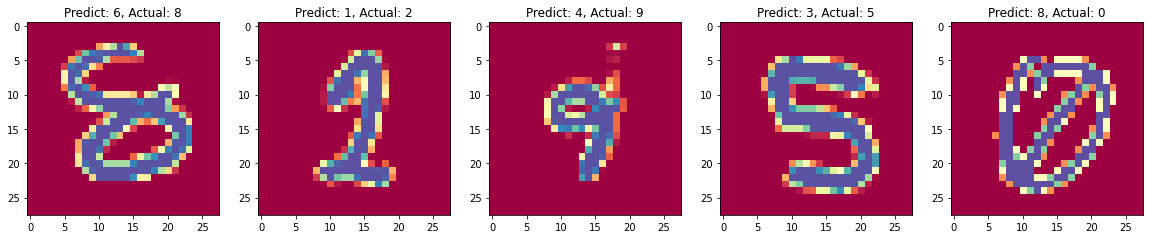

In [60]:
plt.figure(figsize = (20,4))
for i in range(0,5):
    plt.subplot(1,5,i+1)
    random_mis = np.random.randint(0, len(mis))
    plt.imshow(X_test[mis[random_mis]].reshape(28,28),cmap = plt.cm.Spectral)
    plt.title('Predict: {}, Actual: {}'.format(y_pred[mis[random_mis]],y_test[mis[random_mis]]))
plt.show()

In [61]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, y_pred)
cfm

array([[ 918,    0,    0,    0,    0,    9,    8,    3,    6,    1],
       [   1, 1068,    5,    5,    3,    4,    0,    2,   13,    0],
       [   6,    9,  940,   17,   16,    0,   12,   10,   22,    4],
       [   5,    5,   21,  922,    1,   32,    3,   13,   22,    6],
       [   1,    8,    9,    3,  932,    0,    9,    3,    9,   39],
       [  13,    6,    7,   28,    5,  794,   12,    9,   29,   12],
       [   4,    2,    9,    0,    7,   15,  933,    1,    2,    0],
       [   2,    5,    8,    3,    9,    0,    2,  994,    6,   38],
       [   9,   14,    9,   26,    2,   31,    9,    2,  849,   12],
       [   8,    5,    1,   13,   26,   10,    1,   32,    3,  858]],
      dtype=int64)

### Confusion matrix evaluation

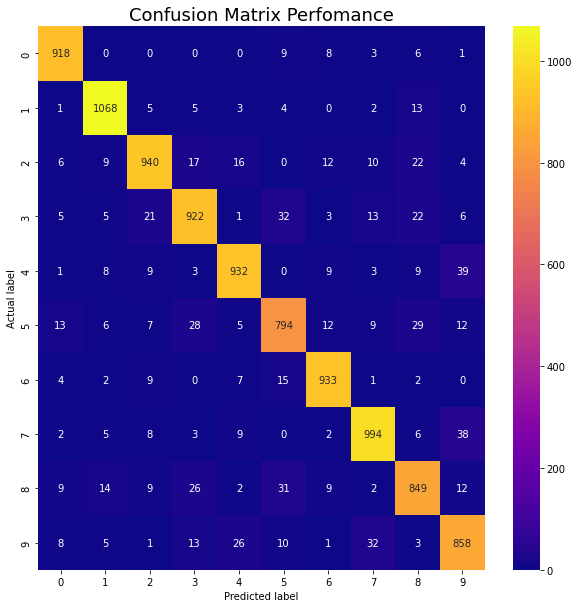

In [76]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(data = cfm,annot = True,cmap = 'plasma',fmt = 'g')
plt.title('Confusion Matrix Perfomance', fontsize = 18)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show()

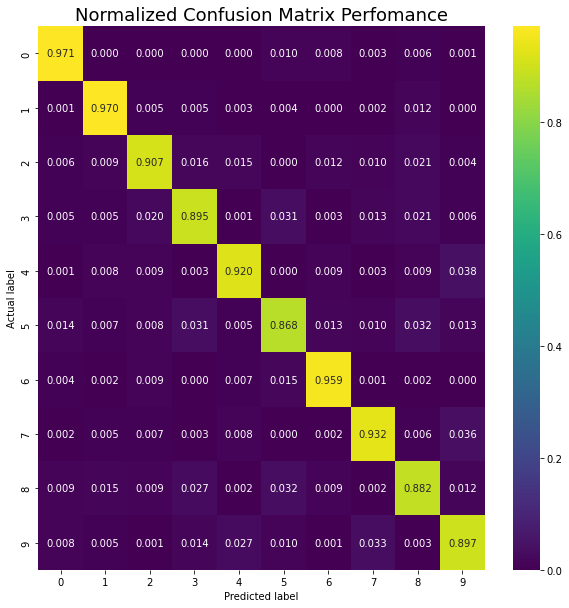

In [75]:
cfm_normalized = cfm.astype('float') / cfm.sum(axis=1)[:, np.newaxis]
fig = plt.figure(figsize=(10,10))
sns.heatmap(data = cfm_normalized,annot = True,cmap = 'viridis',fmt = '.3f')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Normalized Confusion Matrix Perfomance', fontsize = 18)
plt.show()

## Check effect of training set size to model performance

In [92]:
def sample_plot(sample_size):
    sample_reg = LogisticRegression(solver = 'lbfgs') 
    sample_train = X_train[:sample_size].reshape(sample_size,784)
    sample_test = y_train[:sample_size]
    sample_reg.fit(sample_train,sample_test)
    sample_predict = sample_reg.predict(X_test)
    cm = confusion_matrix(sample_predict,y_test)
    cm_normalized = cm.astype('float')/cm.sum(axis = 1)[:,np.newaxis]
    sns.heatmap(data = cm_normalized, annot = True, fmt = '.3f')
    title_string = '{} training samples, accuracy score: {}'.format(sample_size,accuracy_score(sample_predict,y_test))
    plt.title(title_string)
    plt.show()

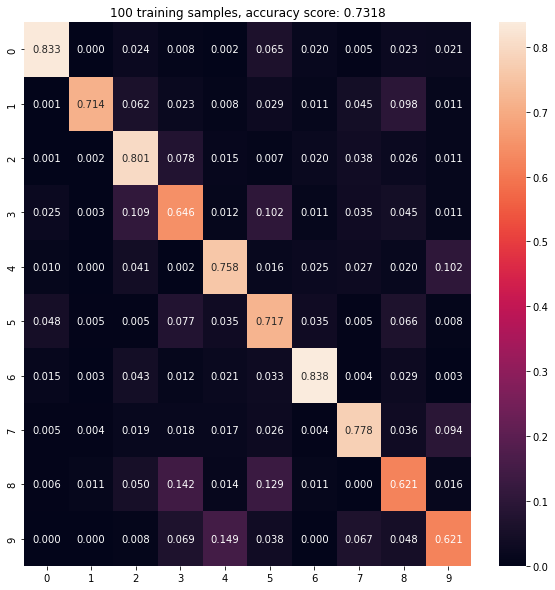

In [97]:
fig = plt.figure(figsize = (10,10))
sample_plot(100)

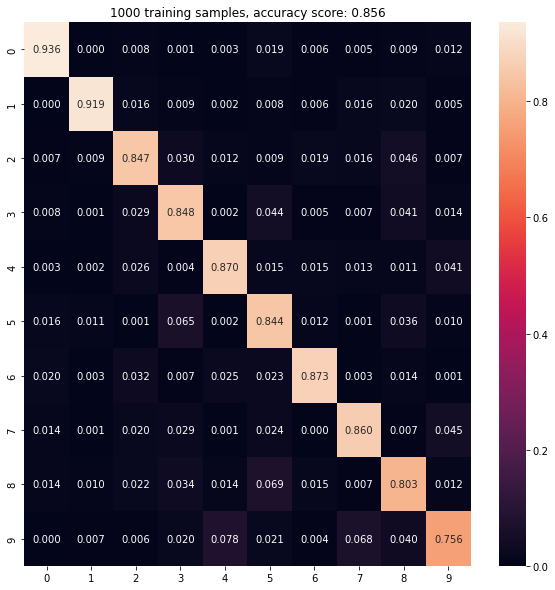

In [99]:
fig = plt.figure(figsize = (10,10))
sample_plot(1000)

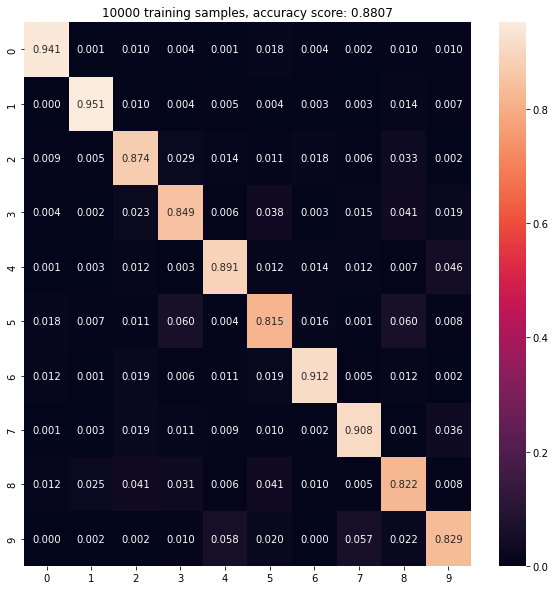

In [100]:
fig = plt.figure(figsize = (10,10))
sample_plot(10000)

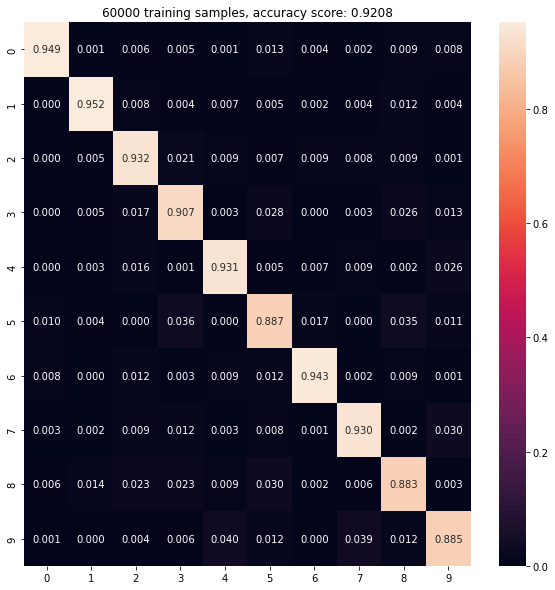

In [102]:
fig = plt.figure(figsize = (10,10))
sample_plot(60000)